In [1]:
### --- Libraries --- ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from scipy import stats
from scipy.interpolate import interp1d
from matplotlib import gridspec
from scipy.optimize import curve_fit
from scipy import fftpack
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

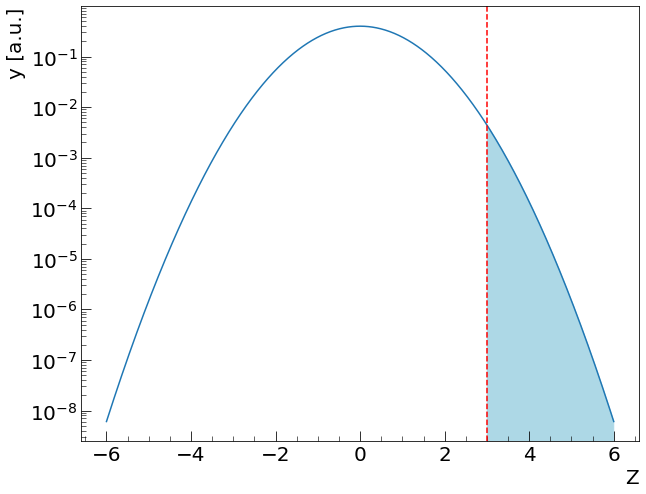

p-value = 0.0013
Assuming as statistically significant a probability that has a Z score of 3 or larger with
respect to a normal distribution means that we are setting a significance level alpha at 0.0013


In [53]:

# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = sp.stats.norm.pdf(xs)

z = 3 

fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(xs, ts)
ax.fill_between(xs, ts, where = xs > np.abs(z), color='lightblue')
ax.axvline(z, linestyle='--', color='red')
# plot settings
ax.set_xlabel('Z', fontsize = 20, loc = 'right')
ax.set_ylabel('y [a.u.]', fontsize = 20, loc = 'top')   
ax.set_yscale('log')                           
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()

plt.show()

# calculate the p-value the right tail because we are interested in a one side test
pvalue = (1. - stats.norm.cdf(z))
# integral in [-inf,-z] + (1 - [-inf,z]) -> We get the sum of the 2 tails 
print('p-value = %1.4f'%(pvalue))

print('Assuming as statistically significant a probability that has a Z score of 3 or larger with') 
print('respect to a normal distribution means that we are setting a significance level alpha at %1.4f'%pvalue)

The probability of observing 15 or more than 15 hurricanes in a single year is 0.0022
Z = 3.4661629670697414


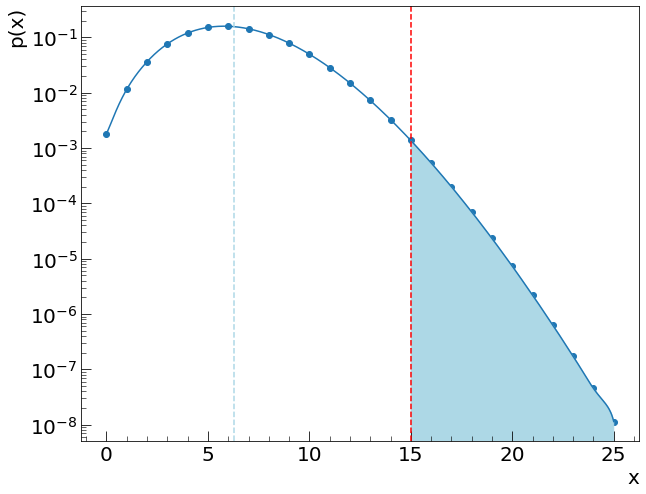

In [27]:
mu = 6.3
x0 = 15

def poisson(l, k):
    '''
        poisson distribution 
    '''
    return l**k * np.exp(-l) / np.math.factorial(k)

# compute the probability that in a single year 15 or more hurricanes are observed 
prob_less_x0 = np.sum([poisson(mu, i) for i in range(x0)])
prob_more_x0 = 1 - prob_less_x0

print('The probability of observing 15 or more than 15 hurricanes in a single year is %1.4f'%(prob_more_x0))


# determine the Z score
Z = abs(x0 - mu) / np.sqrt(mu)
print('Z =', Z)

# plot the measurement and its pdf
fig,ax = plt.subplots(1,1,figsize=(10,8))

x = np.arange(0,26)
y = [poisson(mu, i) for i in x]
w = np.abs(mu - x0)


ax.scatter(x, y)
f = interp1d(x, y, kind = 'cubic')
x_ = np.linspace(0, 25, 1000)

ax.plot(x_, f(x_))
ax.fill_between(x_, f(x_), where=(x_ - mu > w), color='lightblue')
ax.axvline(x0, linestyle='--', color='red')
ax.axvline(mu, linestyle='--', color='lightblue')
# plot settings
ax.set_xlabel('x', fontsize = 20, loc = 'right')
ax.set_ylabel('p(x)', fontsize = 20, loc = 'top')   
ax.set_yscale('log')                           
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()

plt.show()


Observing 15 hurricanes in 2005 was significantly different from average. The probability of observing 15 or more hurricanes in a single year is higher than the set treshold
for a statistically significant probability. Indeed:
\begin{equation}
 P_{>15} = 0.002 > \alpha = 0.0013
\end{equation}


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.786997938137629


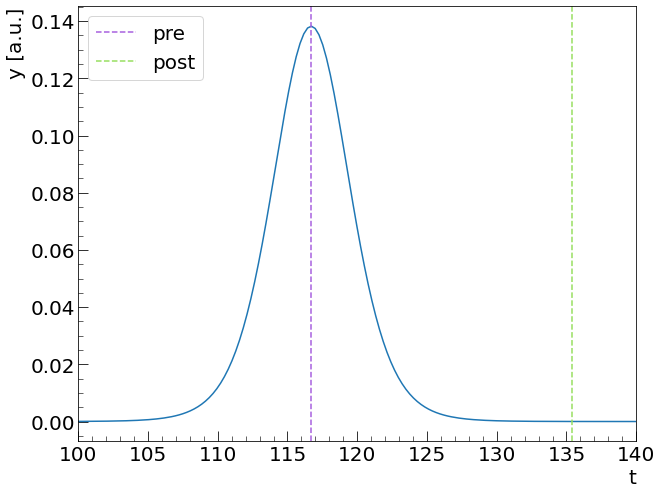

p-value = 1.9956975358671354


In [61]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma_pre = np.sqrt(np.var(pre, ddof=1)) # calculate the variance and its sqrt()
sigma_post = np.sqrt(np.var(post, ddof=1)) # calculate the variance and its sqrt()
mean_pre = np.mean(pre) # mean of the sample pre
mean_post = np.mean(post) # mean of the sample pre

n = 10
sigma = np.sqrt(0.5 * (sigma_pre**2 + sigma_post**2))

# calculate the test statistics

T = (np.abs(mean_post - mean_pre)) / (sigma * np.sqrt(2/n))
print('T =', T)

# plot the t-student distribution
x = np.linspace(mean_pre - mean_post-5, mean_pre + mean_post-5, 1000)
y = stats.t.pdf(x, loc=pre.mean(), scale=pre.std() / np.sqrt(len(pre)), df=len(pre) - 1) # ddof = n-1

fig,ax = plt.subplots(1,1,figsize=(10,8))


ax.plot(x, y)
ax.axvline(mean_pre, linestyle='--', color='#A75FDF',label= 'pre')
ax.axvline(mean_post, linestyle='--', color='#97DF5F', label = 'post')
# plot settings
ax.set_xlabel('t', fontsize = 20, loc = 'right')
ax.set_ylabel('y [a.u.]', fontsize = 20, loc = 'top')  
ax.set_xlim(100, 140) 
#ax.set_yscale('log')                           
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()
ax.legend(loc='best', fontsize=20)
plt.show()



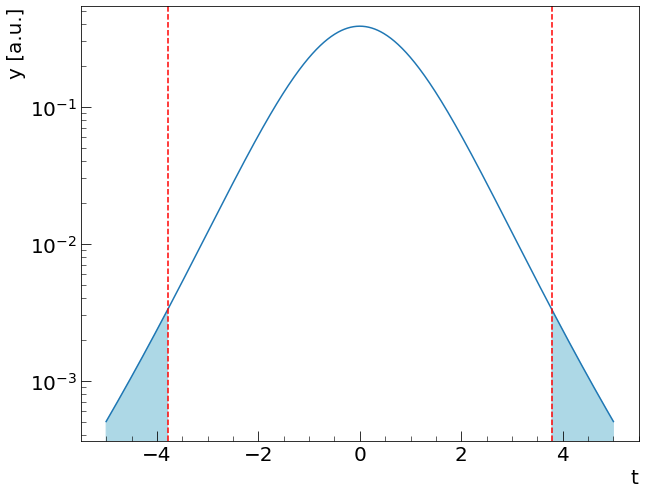

p-value = 1.9957


In [66]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, len(pre) - 1)


fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(xs, ts)
ax.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
ax.axvline(T, linestyle='--', color='red')
plt.axvline(-T, linestyle='--', color='red')
# plot settings
ax.set_xlabel('t', fontsize = 20, loc = 'right')
ax.set_ylabel('y [a.u.]', fontsize = 20, loc = 'top')   
ax.set_yscale('log')                           
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()

plt.show()


# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, len(pre) - 1) + (1. - stats.t.cdf(-T, len(pre) - 1))
# integral in [-inf,-z] + (1 - [-inf,z]) -> We get the sum of the 2 tails 
print('p-value = %1.4f'%(pvalue))





3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [69]:
# load data 
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

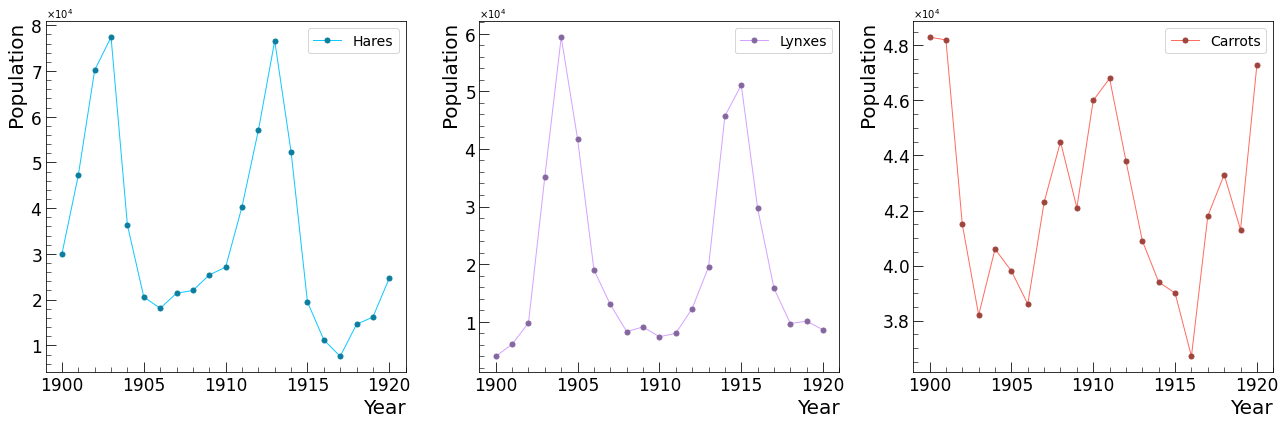

In [70]:

fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(18,6))

x = year

ax1.plot(x,hares, label='Hares', marker = 'o',markerfacecolor = '#0B7D9F',markeredgecolor = '#0B7D9F',markersize=5, lw = 1, color = '#11C8FF')

ax2.plot(x,lynxes, label='Lynxes', marker = 'o',markerfacecolor = '#85669F',markeredgecolor = '#85669F',markersize=5, lw = 1, color = '#D5A3FF')

ax3.plot(x,carrots, label='Carrots', marker = 'o',markerfacecolor = '#9F443D',markeredgecolor = '#9F443D',markersize=5, lw = 1, color = '#FF6D61')

for ax in fig.get_axes():
    # plot settings
    ax.set_xlabel('Year', fontsize = 20, loc = 'right')  
    ax.set_ylabel('Population', fontsize = 20, loc = 'top')                         
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 17)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()
    ax.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    ax.yaxis.major.formatter._useMathText = True
    ax.legend(loc='best', fontsize=14)


fig.tight_layout()
plt.subplots_adjust(hspace=.0)
plt.show()

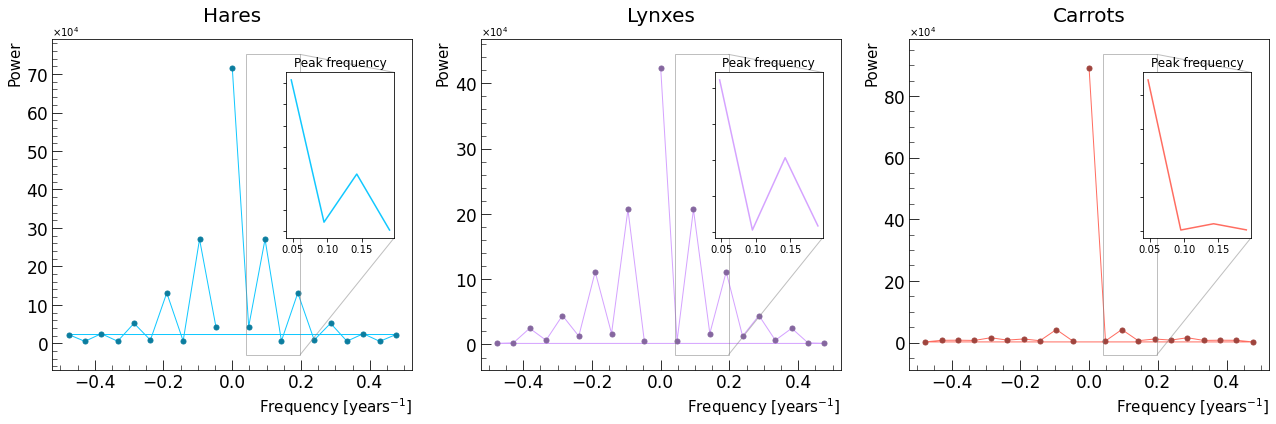

In [71]:
time_step = 1 # data is recorded year by year

# FFT of the signals
hares_fft = fftpack.fft(hares) 
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)

# power spectra 
h_pow = np.abs(hares_fft)
l_pow = np.abs(lynxes_fft)
c_pow = np.abs(carrots_fft) 

# corresponding frequencies
h_freq = fftpack.fftfreq(hares.size, d=time_step)
l_freq = fftpack.fftfreq(lynxes.size, d=time_step)
c_freq = fftpack.fftfreq(carrots.size, d=time_step)

# find the peak frequencies: focus only on the positive frequencies
# find the freq. corresponding to the max power with .argmax()

# hares
h_pos_mask = np.where(h_freq > 0)
h_freqs = h_freq[h_pos_mask]
h_peak_freq = h_freqs[h_pow[h_pos_mask].argmax()]
# lynxes
l_pos_mask = np.where(l_freq > 0)
l_freqs = l_freq[l_pos_mask]
l_peak_freq = l_freqs[l_pow[l_pos_mask].argmax()]
# carrots
c_pos_mask = np.where(c_freq > 0)
c_freqs = c_freq[c_pos_mask]
c_peak_freq = c_freqs[c_pow[c_pos_mask].argmax()]

fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(18,6))

# Plot for hares
ax1.set_title('Hares', fontsize=20, pad = 18)
ax1.plot(h_freq,h_pow, label='Hares', marker = 'o',markerfacecolor = '#0B7D9F',markeredgecolor = '#0B7D9F',markersize=5, lw = 1, color = '#11C8FF')
#inner plot to show the peak frequency
hins = ax1.inset_axes([0.65, 0.4, 0.3, 0.5])
hins.set_title('Peak frequency',fontsize=12)
hins.plot(h_freqs[:4], h_pow[:4],'#11C8FF')
hins.set_yticklabels('')
ax1.indicate_inset_zoom(hins)


# Plot for lynxes
ax2.set_title('Lynxes', fontsize=20, pad = 18)
ax2.plot(l_freq,l_pow, label='Lynxes', marker = 'o',markerfacecolor = '#85669F',markeredgecolor = '#85669F',markersize=5, lw = 1, color = '#D5A3FF')
#inner plot to show the peak frequency
lins = ax2.inset_axes([0.65, 0.4, 0.3, 0.5])
lins.set_title('Peak frequency',fontsize=12)
lins.plot(l_freqs[:4], l_pow[:4],'#D5A3FF')
lins.set_yticklabels('')
ax2.indicate_inset_zoom(lins)

# Plot for carrots
ax3.set_title('Carrots', fontsize=20, pad = 18)
ax3.plot(c_freq,c_pow, label='Carrots', marker = 'o',markerfacecolor = '#9F443D',markeredgecolor = '#9F443D',markersize=5, lw = 1, color = '#FF6D61')
#inner plot to show the peak frequency
cins = ax3.inset_axes([0.65, 0.4, 0.3, 0.5])
cins.set_title('Peak frequency',fontsize=12)
cins.plot(c_freqs[:4], c_pow[:4],'#FF6D61')
cins.set_yticklabels('')
ax3.indicate_inset_zoom(cins)




fig.tight_layout()
plt.subplots_adjust(hspace=.0)
plt.show()


In [8]:
print('Frequency of the peak for hares=', h_peak_freq, 'yrs^(-1)    => Period =', 1/h_peak_freq, 'yrs')
print('Frequency of the peak for lynxes=', l_peak_freq, 'yrs^(-1)   => Period =', 1/l_peak_freq, 'yrs')
print('Frequency of the peak for carrots=', c_peak_freq, 'yrs^(-1)  => Period =', 1/c_peak_freq, 'yrs')

Frequency of the peak for hares= 0.09523809523809523 yrs^(-1)    => Period = 10.5 yrs
Frequency of the peak for lynxes= 0.09523809523809523 yrs^(-1)   => Period = 10.5 yrs
Frequency of the peak for carrots= 0.09523809523809523 yrs^(-1)  => Period = 10.5 yrs


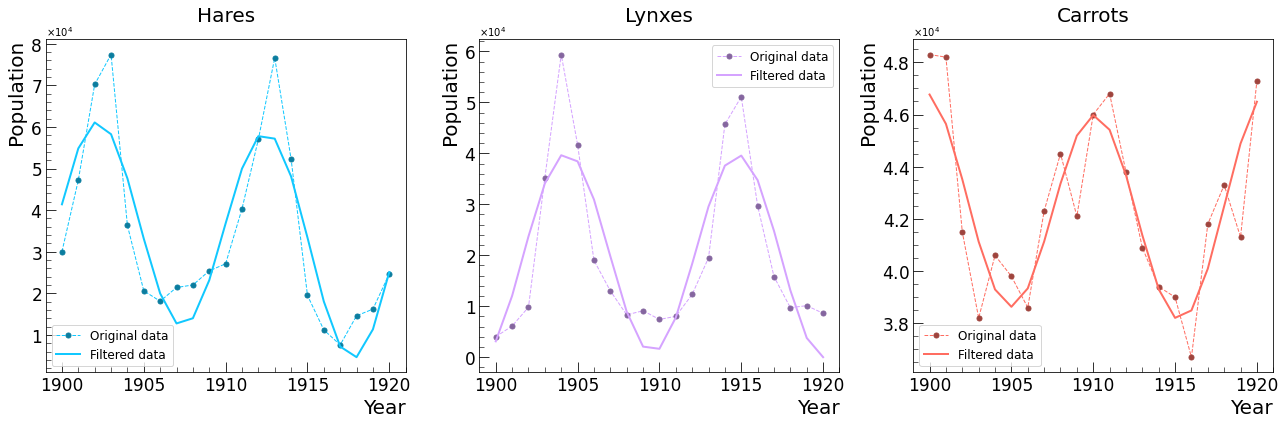

In [72]:
# hares
h_high_freq_fft = hares_fft.copy()
# set to zero all high frequency components that are larger than peak_freq
h_high_freq_fft[np.abs(h_freq) > h_peak_freq] = 0
# calculate the Inverse Fast Fourier Transform
h_filtered_sig = fftpack.ifft(h_high_freq_fft)
# only take the real part
h_real = np.real(h_filtered_sig )

# lynxes
l_high_freq_fft = lynxes_fft.copy()
l_high_freq_fft[np.abs(l_freq) > l_peak_freq] = 0
l_filtered_sig = fftpack.ifft(l_high_freq_fft)
l_real = np.real(l_filtered_sig )

# carrots
c_high_freq_fft = carrots_fft.copy()
c_high_freq_fft[np.abs(c_freq) > c_peak_freq] = 0
c_filtered_sig = fftpack.ifft(c_high_freq_fft)
c_real = np.real(c_filtered_sig )

fig,((ax1,ax2,ax3)) = plt.subplots(1,3,figsize=(18,6))

ax1.set_title('Hares', fontsize=20, pad = 18)
ax1.plot(year,hares, label='Original data', marker = 'o',markerfacecolor = '#0B7D9F',markeredgecolor = '#0B7D9F',markersize=5, ls = 'dashed',lw = 1, color = '#11C8FF')
ax1.plot(year, h_real, label='Filtered data', lw = 2, color = '#11C8FF')

ax2.set_title('Lynxes', fontsize=20, pad = 18)
ax2.plot(year,lynxes, label='Original data', marker = 'o',markerfacecolor = '#85669F',markeredgecolor = '#85669F',markersize=5,ls = 'dashed',lw = 1, color = '#D5A3FF')
ax2.plot(year, l_real, label='Filtered data', lw = 2, color = '#D5A3FF')

ax3.set_title('Carrots', fontsize=20, pad = 18)
ax3.plot(year,carrots, label='Original data', marker = 'o',markerfacecolor = '#9F443D',markeredgecolor = '#9F443D',markersize=5, ls = 'dashed', lw = 1, color = '#FF6D61')
ax3.plot(year, c_real, label='Filtered data', lw = 2, color = '#FF6D61')

for ax in fig.get_axes():
    # plot settings
    ax.set_xlabel('Year', fontsize = 20, loc = 'right')  
    ax.set_ylabel('Population', fontsize = 20, loc = 'top')                         
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 17)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
    ax.minorticks_on()
    ax.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    ax.yaxis.major.formatter._useMathText = True
    ax.legend(loc='best', fontsize=12)


fig.tight_layout()
plt.subplots_adjust(hspace=.0)
plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Original image')

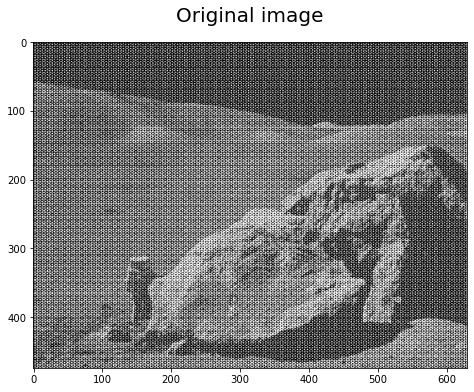

In [24]:
# Load the image using pylab.imread()
im = plt.imread('moonlanding.png').astype(float)

plt.figure(figsize=(12,6))
plt.imshow(im, plt.cm.gray)
plt.title('Original image', fontsize=20, pad = 20)

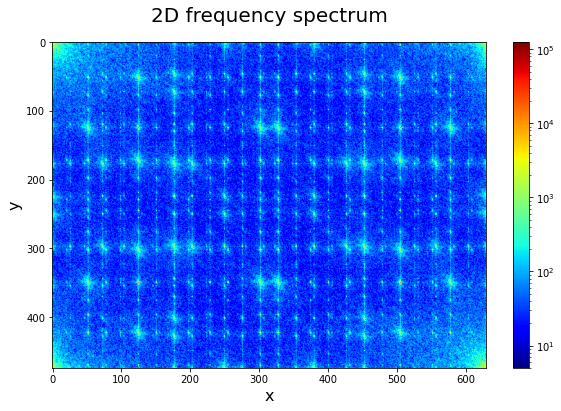

In [25]:
# using 2DFFT function plot the spectrum 

fft_im = fftpack.fft2(im)

plt.figure(figsize=(12,6))
img = plt.imshow(np.abs(fft_im), norm=colors.LogNorm(vmin=5), cmap='jet')
plt.colorbar(img, fraction=0.046, pad=0.04)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('2D frequency spectrum', fontsize=20, pad = 20)
plt.show()

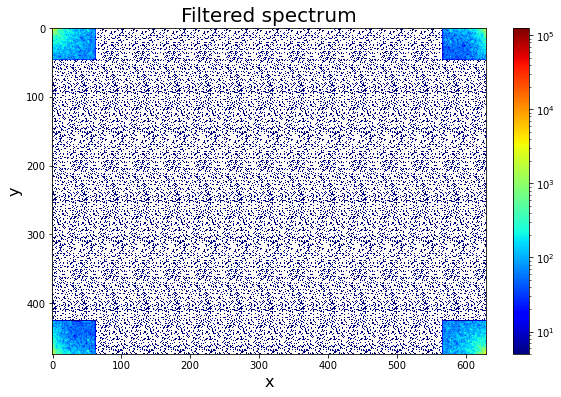

In [40]:
# the noise is contained in the high-frequency part of the spectrum
# the FFT of the image can be seen in terms of rows and columns 

threshold = 0.1 # threshold for cutting high frequency components
fft_im2 = fft_im.copy()

r, c = fft_im2.shape # r=rows c=columns

fft_im2[int(r*threshold):int(r*(1-threshold))] = 0 # Set to zero all r between r*threshold and r*(1-threshold)
fft_im2[:, int(c*threshold):int(c*(1-threshold))] = 0 # same thing for columns


plt.figure(figsize=(12,6))
img2 = plt.imshow(np.abs(fft_im2), norm=colors.LogNorm(vmin=5), cmap='jet')
plt.colorbar(img2, fraction=0.046, pad=0.04)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Filtered spectrum', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Reconstructed Image')

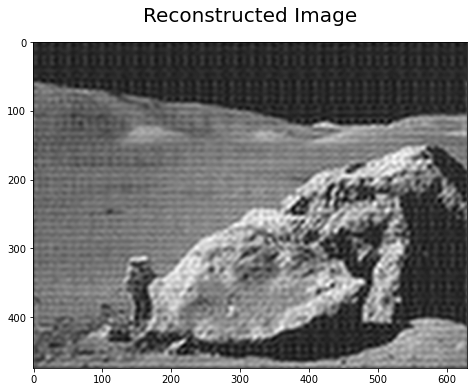

In [41]:
filtered_sig = fftpack.ifft2(fft_im2)
# only take the real part
real_filtered_signal = np.real(filtered_sig)
# plot the result of the IFFT

plt.figure(figsize=(12,6))
plt.imshow(real_filtered_signal, plt.cm.gray)
plt.title('Reconstructed Image',fontsize=20, pad = 20)